<a href="https://colab.research.google.com/github/SunilY137/EDA-1/blob/main/Copy_of_Appliances_Energy_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project title :- Predict the electrical energy consumption of a Appliances.**


**This Notebook is Prepared by Team (PHOENIX) Including:**

**Sunil Yadav**

**Saurabh Verma**

**Manish Kumar**

**Ajay J**

**Vikram Kumar Paswan**


# **Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.decomposition import PCA,LatentDirichletAllocation
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,ExtraTreesRegressor
from lightgbm import LGBMRegressor
from sklearn.neural_network import MLPRegressor
import xgboost as xgb
from sklearn import neighbors
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression

import time
from datetime import datetime
from math import sqrt
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# mount Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# loading the csv_file into pandas dataframe
data=pd.read_csv('/content/gdrive/MyDrive/project 2/data_application_energy.csv')

# **Data Exploration**

In [ ]:
# take look at dataframe
data.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [ ]:
# Checking the data set's last 5 rows
data.tail()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.7,...,23.2,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.7,...,23.2,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.7,...,23.2,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.7,...,23.2,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784
19734,2016-05-27 18:00:00,430,10,25.500000,46.600000,25.264286,42.971429,26.823333,41.156667,24.7,...,23.2,46.8450,22.200000,755.2,57.000000,4.000000,27.000000,13.200000,34.118851,34.118851


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [ ]:
# check shape of dataset
print('The number of rows in dataset is = ' , data.shape[0])
print('The number of columns in dataset is = ' , data.shape[1])

The number of rows in dataset is =  19735
The number of columns in dataset is =  29


In [ ]:
# Statistical description of features
data.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


***The feature "Appliances" represnt the energy consumption in Wh.The watt-hour (symbolized Wh) is a unit of energy equivalent to one watt (1 W) of power expended for one hour (1 h) of time. For the better interpretation,changing feature name to "Consumption".***

***Features lights,rv1, and rv2 are not useful so will drop these features from the data set.***

In [ ]:
#Number of null values in all columns
data.isnull().sum().sort_values(ascending = True)

date           0
Tdewpoint      0
Visibility     0
Windspeed      0
RH_out         0
Press_mm_hg    0
T_out          0
RH_9           0
T9             0
RH_8           0
T8             0
RH_7           0
T7             0
rv1            0
RH_6           0
RH_5           0
T5             0
RH_4           0
T4             0
RH_3           0
T3             0
RH_2           0
T2             0
RH_1           0
T1             0
lights         0
Appliances     0
T6             0
rv2            0
dtype: int64

 ***As shown above , there are no null values in the dataset.***

In [ ]:
# number of duplicates
data.duplicated().sum()

0

 ***No duplicate values present in this dataset.***

In [ ]:
# Renaming column
data.rename(columns={'Appliances':'Consumption'},inplace=True)

# Dropping Unneccesary columns
data.drop(['lights','rv1','rv2'],inplace=True,axis=1)

#### ***The relaionship between the Humidity and Temperature is inversely proportional. Relative humidity changes when temperatures change. Because warm air can hold more water vapor than cool air, relative humidity falls when the temperature rises if no moisture is added to the air.***

Creating two columns for Average Humidity and Average Temperature.

In [ ]:
# Average Temperature
data['Avg_Temp']=(data.T1 + data.T2 + data.T3 + data.T4 + data.T5 + data.T7
                                 + data.T8 + data.T9 ) / 8

data['Avg_Temp'].apply(lambda x: format(x,'.2f'))

0        18.43
1        18.44
2        18.42
3        18.40
4        18.41
         ...  
19730    24.87
19731    24.85
19732    24.82
19733    24.76
19734    24.74
Name: Avg_Temp, Length: 19735, dtype: object

In [ ]:
# Average Humidity 
data['Avg_Humidity']=(data.RH_1 + data.RH_2 + data.RH_3 + data.RH_4 + data.RH_5 + data.RH_7
                                  + data.RH_8 + data.RH_9 ) / 8

data['Avg_Humidity'].apply(lambda x: format(x,'.2f'))     

0        46.74
1        46.67
2        46.56
3        46.47
4        46.46
         ...  
19730    46.14
19731    46.09
19732    46.24
19733    46.24
19734    46.19
Name: Avg_Humidity, Length: 19735, dtype: object

# **Dependable Variable**

In [ ]:
# target variable
data.Consumption.describe()

count    19735.000000
mean        97.694958
std        102.524891
min         10.000000
25%         50.000000
50%         60.000000
75%        100.000000
max       1080.000000
Name: Consumption, dtype: float64

<Axes: >

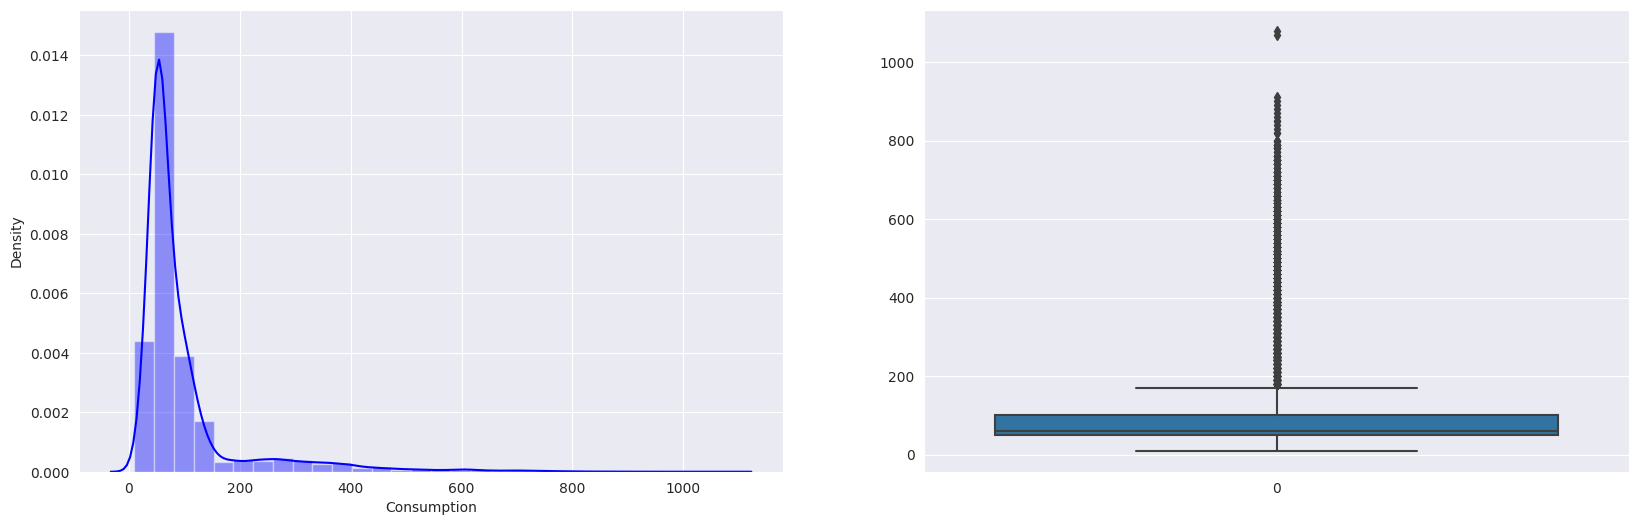

In [ ]:
plt.figure(figsize=(20,6))
sns.set_style('darkgrid')

# Distribution of Energy Consumption
plt.subplot(1,2,1)
sns.distplot(data.Consumption,bins=30,color='Blue')

# Box plot for Energy Consumption
plt.subplot(1,2,2)
sns.boxplot(data.Consumption)

 In above graph we see that the **75% of Appliance consumption is less than 100 Wh** . With the maximum consumption of 1080 Wh , there will be outliers in this column and there are small number of cases where consumption is very high

# **Independent Variable**

In [ ]:
# Creating a seperate data frames for all temperature varibales and all Humidity variables

# Temprature Data Frame
Temperature_df=data[['T1','T2','T3','T4','T5','T6','T7','T8','T9','Avg_Temp','T_out' ]]

# Renaming column
Temperature_df.rename(columns={'T1':'kitchen_Temp','T2': 'living_room_Temp','T3':'laundry_room_temp',
                               'T4':'office_room_temp','T5':'bathroom_temp','T6':'outside_building_temp',
                               'T7':'ironing_room_temp','T8':'teenager_room_temp',
                               'T9':'parents_room_temp','T_out':'Chievres_weather_station'},inplace=True)

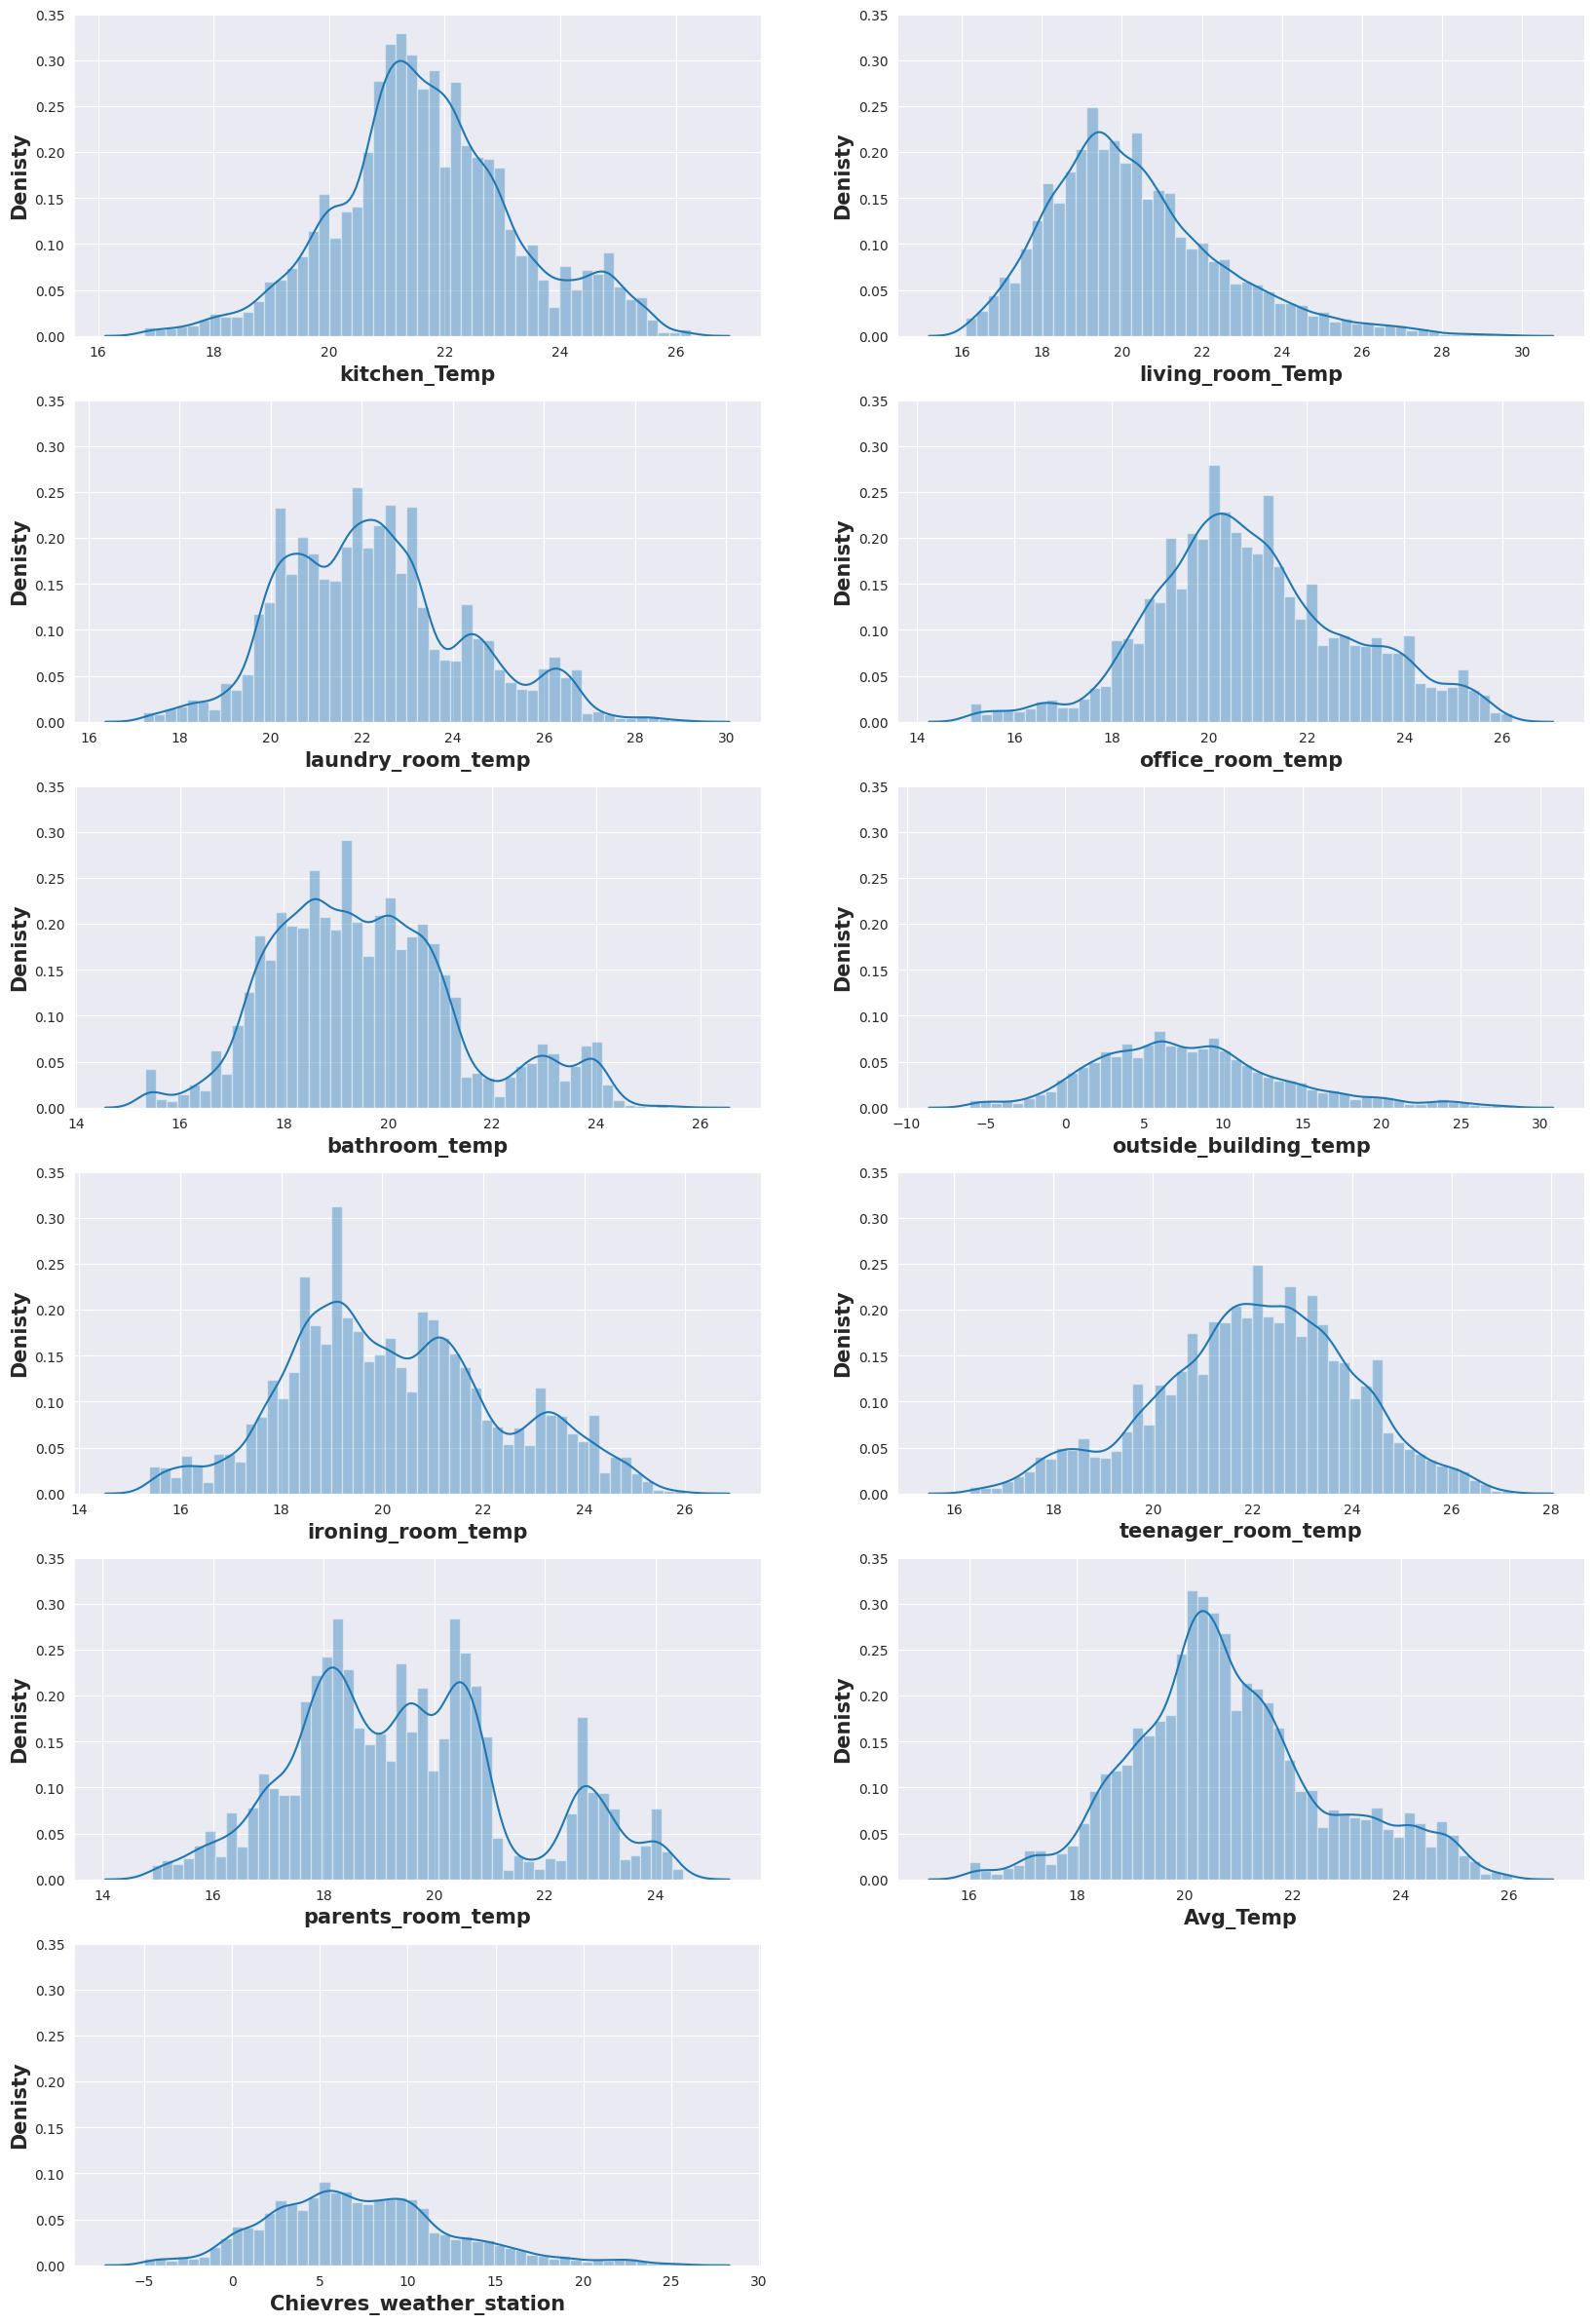

In [ ]:
# Let's create subplot of histogram for all temperature values

Feature=Temperature_df.columns.to_list()  # Lsit of all temperature variables

axes=[]  # For axis
a=0      # No of rows

# Range for subplots 

while a < 6 :
  for i in range(2):  # No. of column
    axes.append((a,i))
  a+=1

# Plot for Subplots
sns.set_style('darkgrid')
figure,axis=plt.subplots(6,2,figsize=(20,30))

plt.xlabel(Feature[i], fontsize=15,fontdict={"weight": "bold"})
plt.ylabel('Density', fontsize=15,fontdict={"weight": "bold"})

for i in range (11):
  ax1=sns.distplot(Temperature_df[Feature[i]],ax=axis[axes[i][0],axes[i][1]])
  ax1.set_xlabel(Feature[i],size=15,fontdict={"weight": "bold"})
  ax1.set(ylim=(0,0.35))
  ax1.set_ylabel('Denisty',size=15,fontdict={"weight": "bold"})

figure.delaxes(axis[5,1]) # Delete extra subplot

#### **Outside, the minimum temperature is -6.06°C, the maximum temperature is 28.29°C, and the average temperature is 7.91°C.***

#### ***The average temperature inside is around 20.81°C, the parents' room has the lowest minimum temperature of 14.69°C, and the living room has the highest maximum temperature of 29.86°C, which shows that the difference between outside and inside is quite large. Inside a lot of radiator heaters are used to maintain the temperature inside each room.***

In [ ]:
# Humidity Data Frame
Humidity_df=data[['RH_1','RH_2','RH_3','RH_4','RH_5','RH_6',
                                  'RH_7','RH_8','RH_9','Avg_Humidity','RH_out']]

# Renaming column
Humidity_df.rename(columns={'RH_1':'kitchen_hum','RH_2': 'living_room_hum','RH_3':'laundry_room_hum',
                            'RH_4':'office_room_hum','RH_5':'bathroom_hum','RH_6':'outside_building_hum',
                            'RH_7':'ironing_room_hum','RH_8':'teenager_room_hum',
                            'RH_9':'parents_room_hum','RH_out':'Chievres_weather_station'},inplace=True)

In [ ]:
Humidity_df.describe()

,kitchen_hum,living_room_hum,laundry_room_hum,office_room_hum,bathroom_hum,outside_building_hum,ironing_room_hum,teenager_room_hum,parents_room_hum,Avg_Humidity,Chievres_weather_station
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,40.259739,40.420420,39.242500,39.026904,50.949283,54.609083,35.388200,42.936165,41.552401,41.221952,79.750418
std,3.979299,4.069813,3.254576,4.341321,9.022034,31.149806,5.114208,5.224361,4.151497,3.977196,14.901088
min,27.023333,20.463333,28.766667,27.660000,29.815000,1.000000,23.200000,29.600000,29.166667,30.842798,24.000000
25%,37.333333,37.900000,36.900000,35.530000,45.400000,30.025000,31.500000,39.066667,38.500000,38.354583,70.333333
50%,39.656667,40.500000,38.530000,38.400000,49.090000,55.290000,34.863333,42.375000,40.900000,40.572708,83.666667
75%,43.066667,43.260000,41.760000,42.156667,53.663333,83.226667,39.000000,46.536000,44.338095,44.162176,91.666667
max,63.360000,56.026667,50.163333,51.090000,96.321667,99.900000,51.400000,58.780000,53.326667,53.947153,100.000000


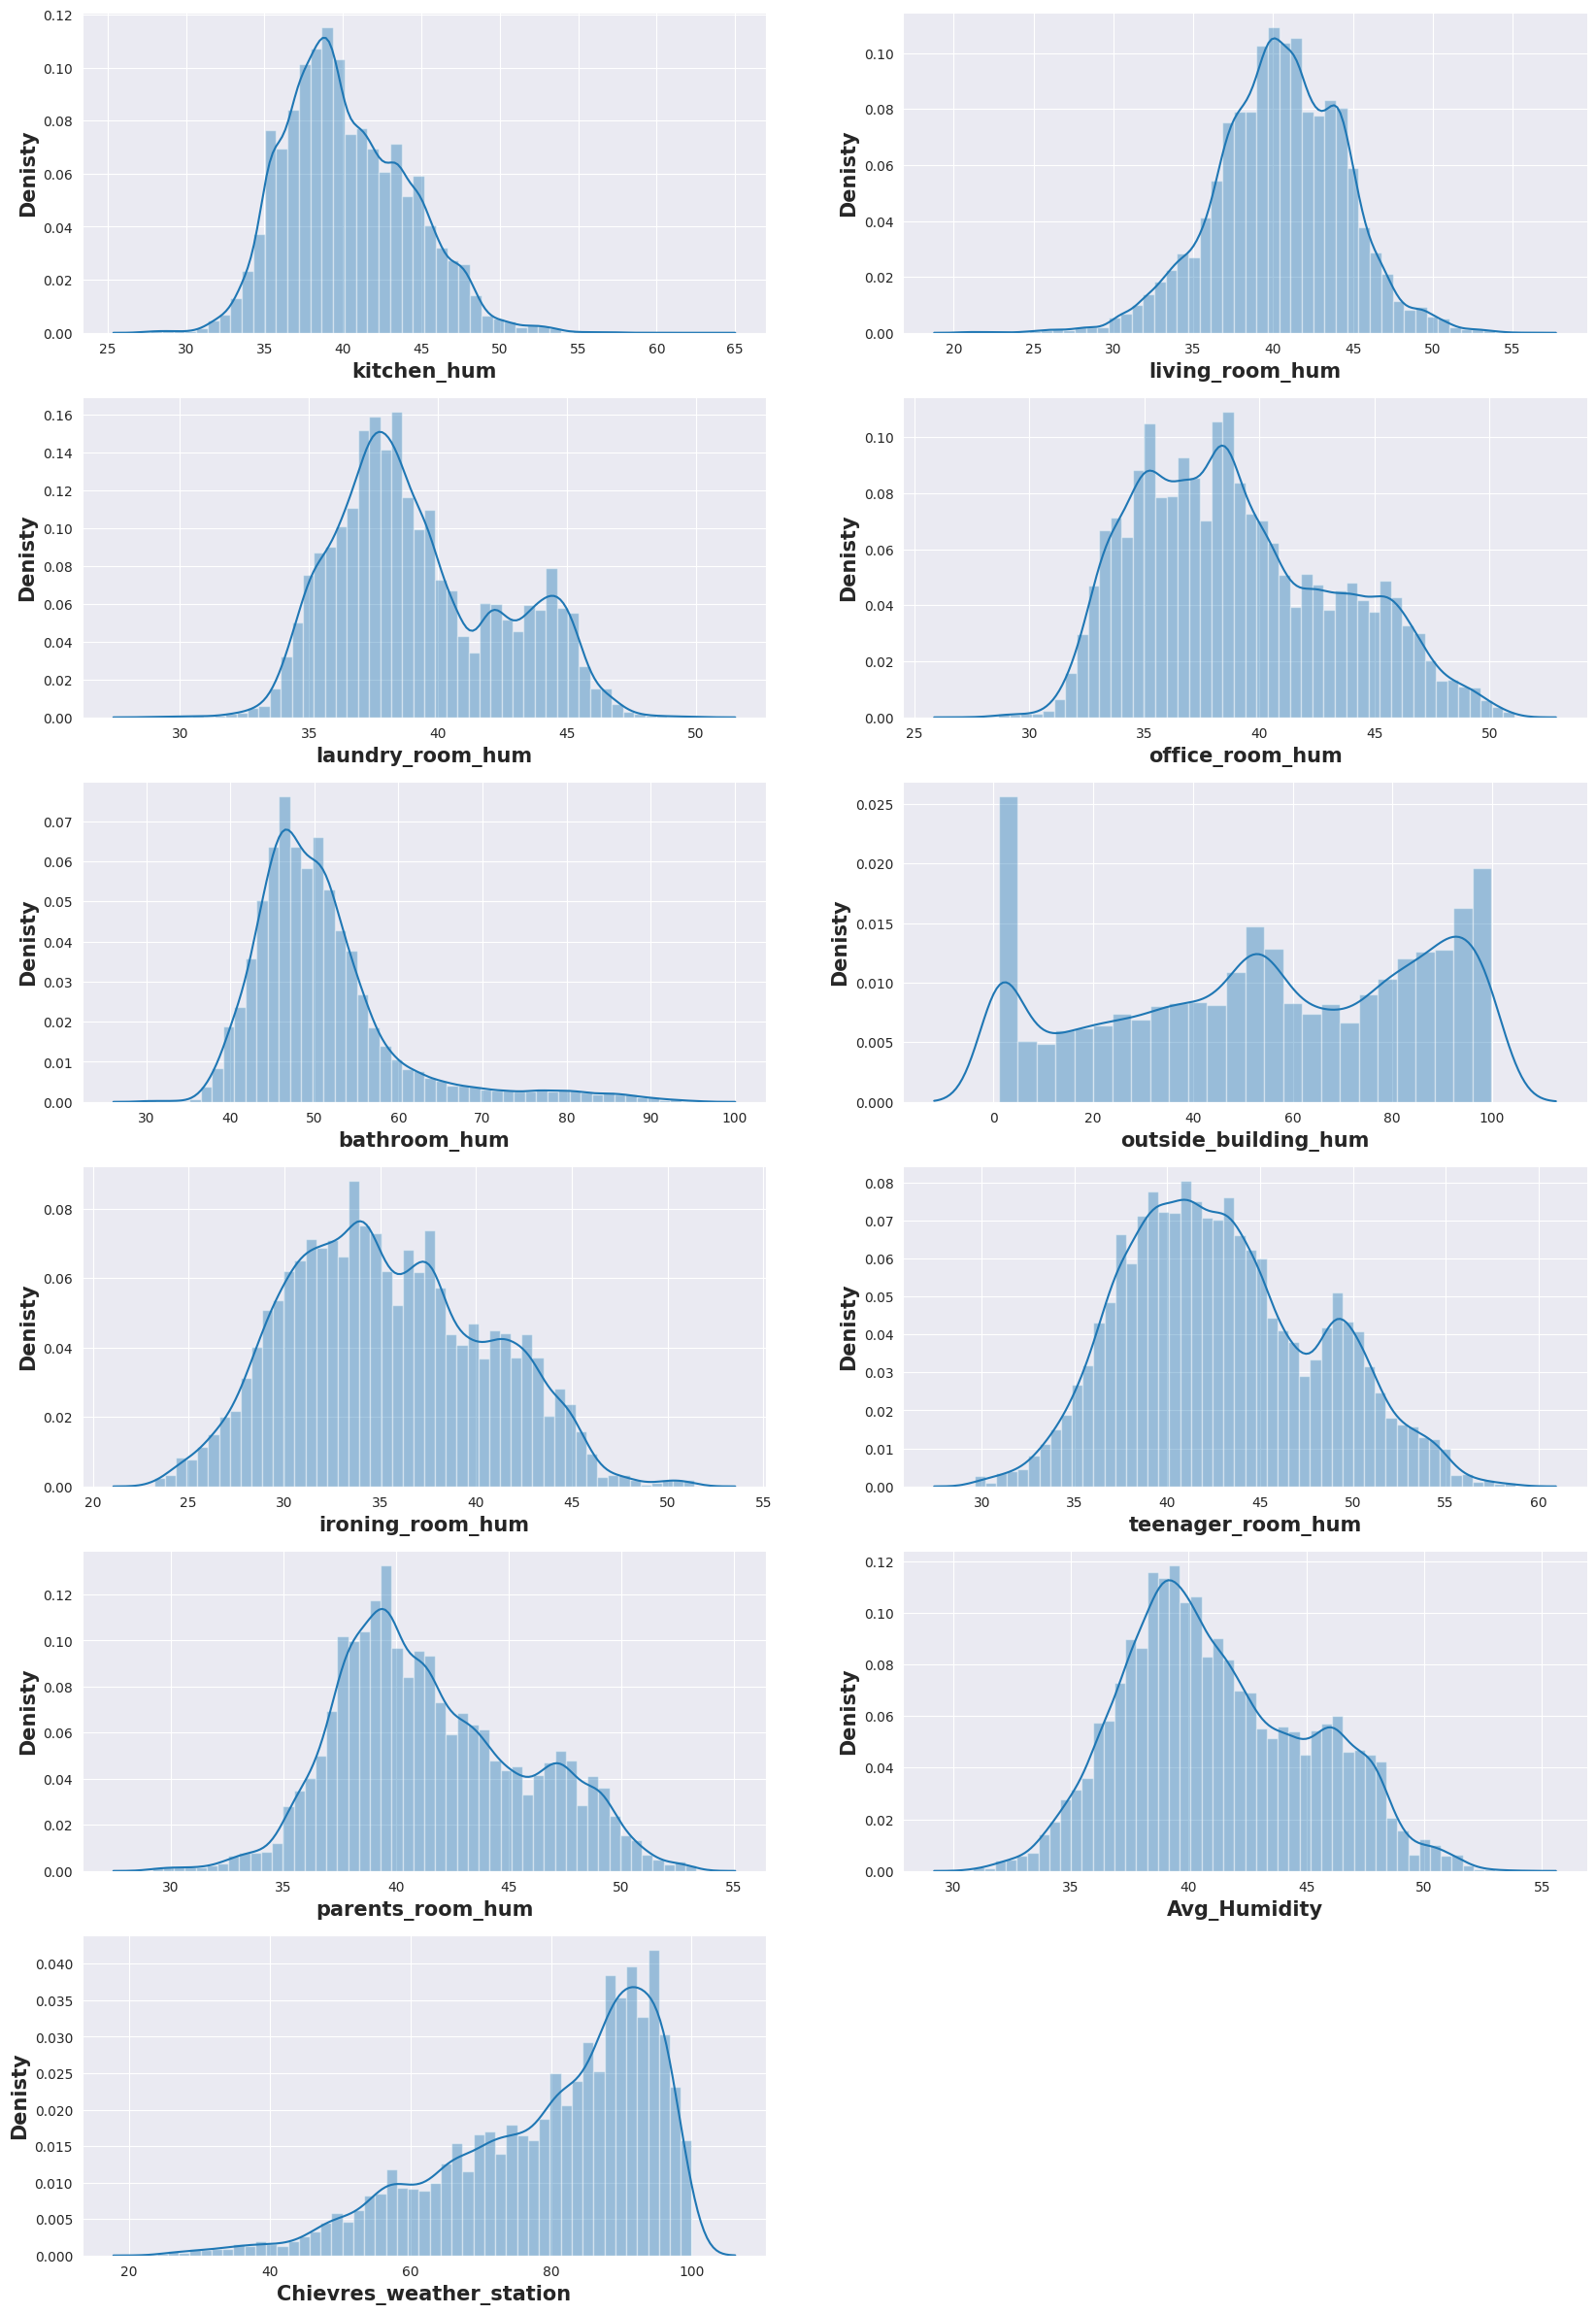

In [ ]:
# Let's create subplot of histogram for all Humidity values

Feature=Humidity_df.columns.to_list()  # Lsit of all Humidity variables

axes=[]  # For axis
a=0      # No of rows

# Range for subplots 
while a < 6 :
  for i in range(2):  # No. of column
    axes.append((a,i))
  a+=1

# Plot for Subplots

figure,axis=plt.subplots(6,2,figsize=(20,30))

for i in range (11):
  ax1=sns.distplot(Humidity_df[Feature[i]],ax=axis[axes[i][0],axes[i][1]])
  ax1.set_xlabel(Feature[i],size=15,fontdict={"weight": "bold"})
  ax1.set_ylabel('Denisty',size=15,fontdict={"weight": "bold"})

figure.delaxes(axis[5,1])


#### ***Ideally, a home should have a humidity level of about 45%. If it dips below 30%, it's much too dry, and if it's above 50%, the high humidity may start to feel uncomfortable.***

#### ***The average humidity inside the house is 41.22% ,which is less than 45% and more than 30%.***

In [ ]:
Chievres_weather_station_df=data[['T_out','RH_out','Press_mm_hg','Tdewpoint','Visibility',
                                                  'Windspeed']]

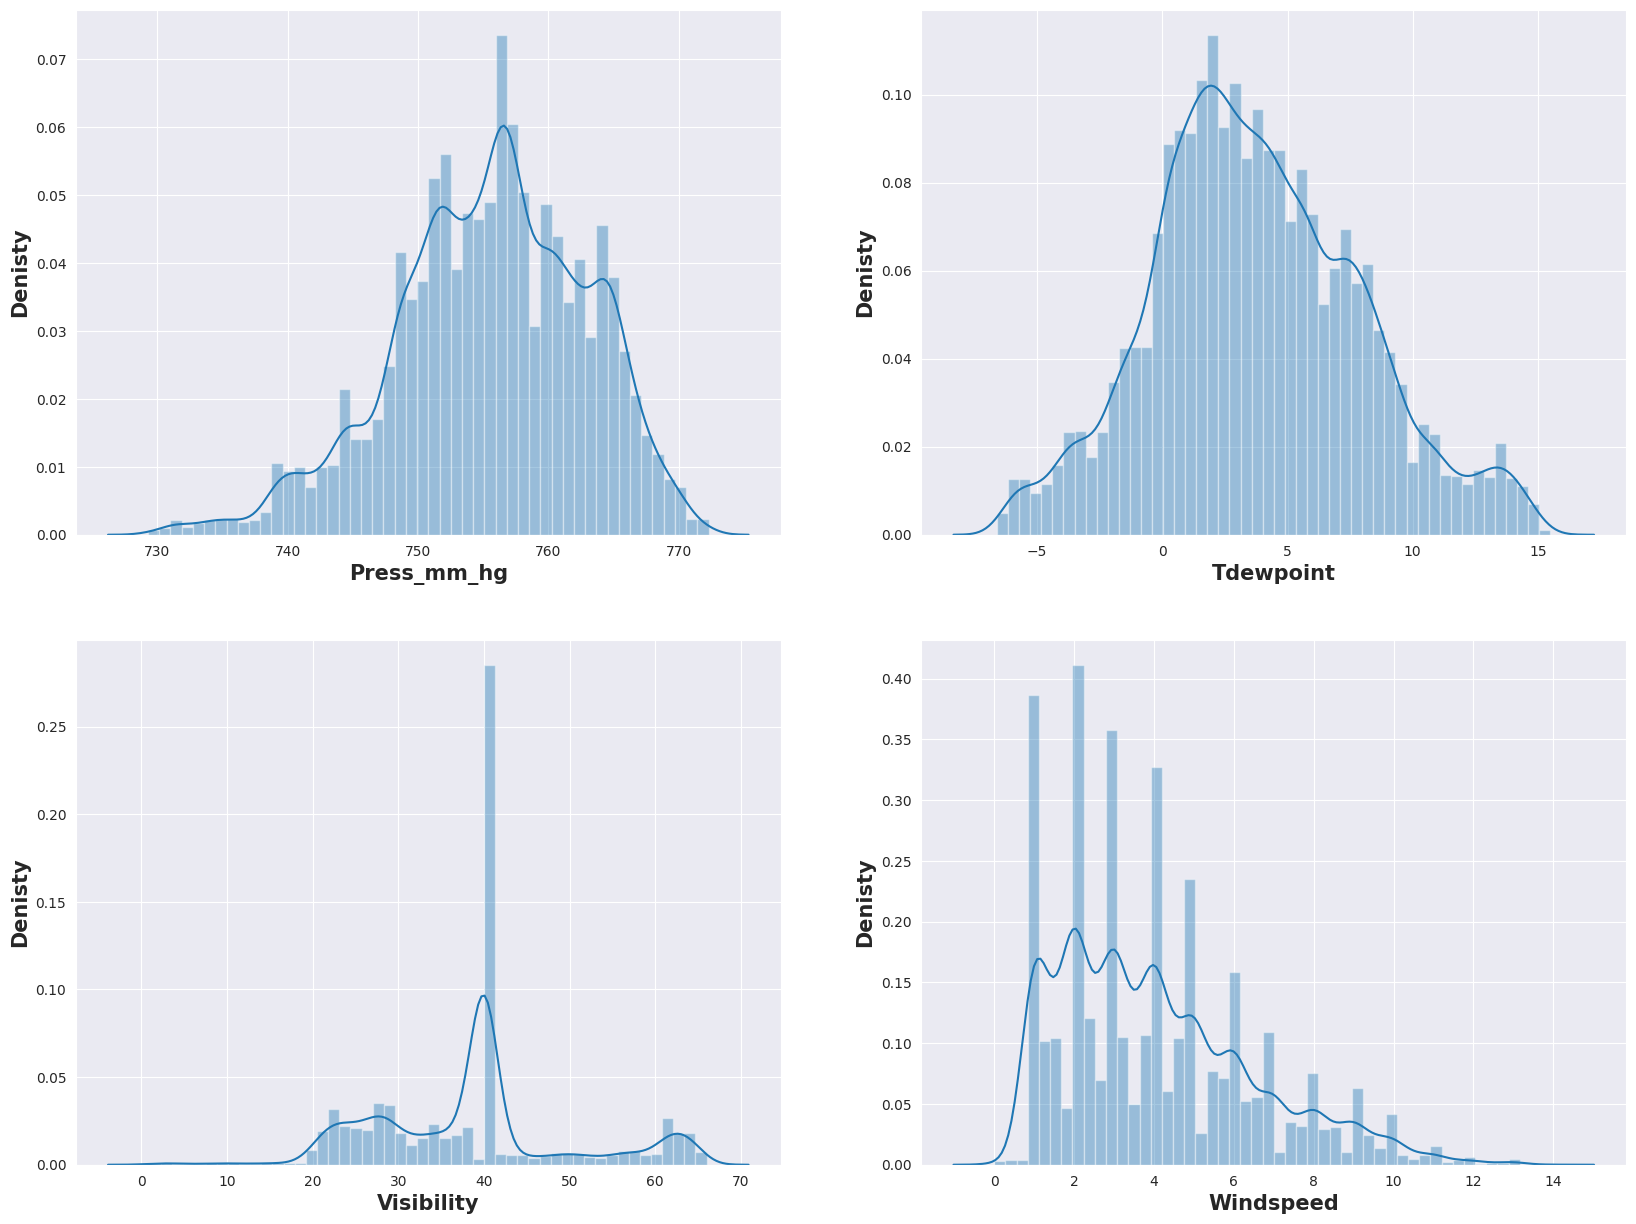

In [ ]:
# Let's create subplot of distribution plot for data from Chievres weather station df

Feature=Chievres_weather_station_df.columns.to_list()[2:]  # List of Chievres weather station df variables

axes=[]  # For axis
a=0      # No of rows

# Range for subplots 

while a < 2 :
  for i in range(2):  # No. of column
    axes.append((a,i))
  a+=1

# Plot for Subplots
sns.set_style('darkgrid')
figure,axis=plt.subplots(2,2,figsize=(20,15))

plt.xlabel(Feature[i], fontsize=15,fontdict={"weight": "bold"})
plt.ylabel('Density', fontsize=15,fontdict={"weight": "bold"})

for i in range (4):
  ax1=sns.distplot(Chievres_weather_station_df[Feature[i]],ax=axis[axes[i][0],axes[i][1]])
  ax1.set_xlabel(Feature[i],size=15,fontdict={"weight": "bold"})
  ax1.set_ylabel('Denisty',size=15,fontdict={"weight": "bold"})

### **Observations based on distribution plot**
---
1. All humidity values except RH_6 and RH_out follow a Normal
distribution, i.e., all the readings from sensors inside the home
are from a Normal distribution.
2. Similarly, all temperature readings follow a Normal distribution except
for T9.
3. Out of the remaining columns, we can see that
Visibility, Windspeed and Appliances are skewed.
4. The random variables rv1 and rv2 have more or less the
same values for all the recordings.
5. The output variable Appliances has most values less than 200Wh,
showing that high energy consumption cases are very low.
6. No column has a distribution like the target variable Appliances.
Hence, there are no feature independent feature with a linear
relationship with the target.

In [ ]:
Chievres_weather_station_df.describe()

,T_out,RH_out,Press_mm_hg,Tdewpoint,Visibility,Windspeed
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,7.411665,79.750418,755.522602,3.760707,38.330834,4.039752
std,5.317409,14.901088,7.399441,4.194648,11.794719,2.451221
min,-5.000000,24.000000,729.300000,-6.600000,1.000000,0.000000
25%,3.666667,70.333333,750.933333,0.900000,29.000000,2.000000
50%,6.916667,83.666667,756.100000,3.433333,40.000000,3.666667
75%,10.408333,91.666667,760.933333,6.566667,40.000000,5.500000
max,26.100000,100.000000,772.300000,15.500000,66.000000,14.000000


#### Pressure :-***Atmospheric pressure is an indicator of weather. When a low-pressure system moves into an area, it usually leads to cloudiness, wind, and precipitation. High-pressure systems usually lead to fair, calm weather.***

 ####  ***Average atmospheric pressure is 755.52 mm, which is ideal by any standards.***

 ---

#### Dew point Temperature :- ***By defination the dew point is the temperature below which the water vapour in a volume of air at a constant pressure will condense into liquid water. It is the temperature at which the air is saturated with moisture.***

 #### ***The lower dew point temperature means air is dry and cold in the atmosphere,which is also indicated by the atmospheric temperatures.***
 ----

#### Visibility :- ***Visibility is the distance you can see as determined by light and weather conditions. Weather conditions that affect visibility are fog, mist and smog.***

 #### ***We can conclude that visibility is very good in the area since 75% of the data falls between 29km and 66km visibilty.***
 ----

#### Windspeed :- ***There is mostly a light and gentle breeze in the area as 75% of the wind speed data falls within the 0 m/s to 5.5 m/s range.***

----


# **Energy Consumption & Variables.**

#### We have 4.5 months data and dates are in 'Date-Time' format.For computational purpose we will create few new columns for Day,Time,Month,Date,Hour.

In [ ]:
# Changing Date to Date-Time format
data['Date_Time']=data['date'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))

# Creating column with Year-Month-Day format
data['Date']=data['Date_Time'].apply(lambda x: datetime.strftime(x,'%Y-%m-%d'))

# Creating column for month number
data['Month']=data['Date_Time'].apply(lambda x:datetime.strftime(x,'%m'))

# Creating column for day of week
data['Day']=data['Date_Time'].apply(lambda x:datetime.strftime(x,'%A'))

# Creating column for hour of day (24 hrs in a day)
data['Hour']=data['Date_Time'].apply(lambda x:datetime.strftime(x,'%H'))

# Dropping unneccessary columns
data.drop(['date','Date_Time'],inplace=True,axis=1)

In [ ]:
# let's display new Data frame
data.head()

,Consumption,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,RH_out,Windspeed,Visibility,Tdewpoint,Avg_Temp,Avg_Humidity,Date,Month,Day,Hour
0,60,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,...,92.0,7.000000,63.000000,5.3,18.435000,46.742500,2016-01-11,01,Monday,17
1,60,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,...,92.0,6.666667,59.166667,5.2,18.439167,46.672708,2016-01-11,01,Monday,17
2,50,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,...,92.0,6.333333,55.333333,5.1,18.421667,46.562917,2016-01-11,01,Monday,17
3,50,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,...,92.0,6.000000,51.500000,5.0,18.396250,46.468750,2016-01-11,01,Monday,17
4,60,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,...,92.0,5.666667,47.666667,4.9,18.408750,46.462917,2016-01-11,01,Monday,17


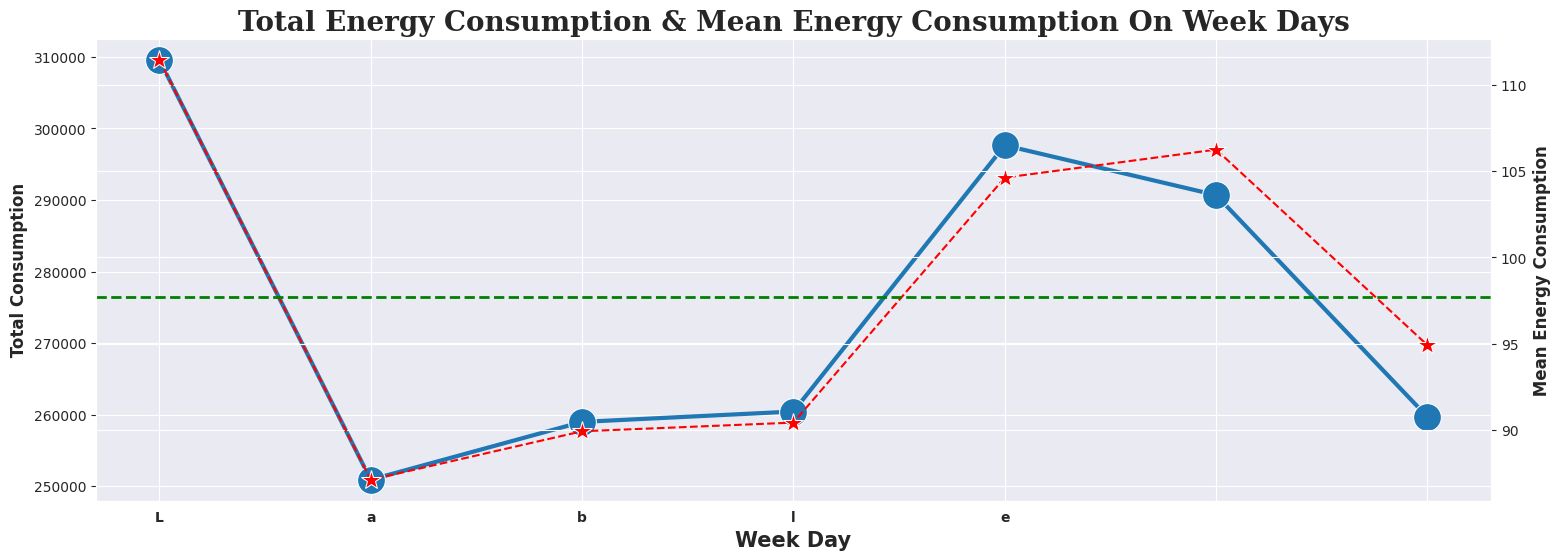

In [ ]:
# TOTAL AND MEAN MEAN ENERGY CONSUMPTION ACCORDING TO DAY OF WEEK

sns.set_style('darkgrid')

fig,axis1=plt.subplots(figsize=(18,6))
axis1=sns.lineplot(x=data.Day,y=data.Consumption,marker='o',ci=None,
             linewidth=3,markersize=20,estimator=np.sum)
axis1.set_title( 'Total Energy Consumption & Mean Energy Consumption On Week Days',
                fontsize=20,fontdict={"weight": "bold"}, fontfamily='serif')
axis1.set_xlabel('Week Day', fontsize=15,fontdict={"weight": "bold"})
axis1.set_ylabel(' Total Consumption ', fontsize=12,fontdict={"weight": "bold"})
axis1.set_xticklabels('Lable',fontsize=10,fontdict={"weight": "bold"})

##-------------------------------------------------------------------------------------------------##
# Specifying The Same Axis
axis2= axis1.twinx()
##-------------------------------------------------------------------------------------------------##
axis2=sns.lineplot(x=data.Day,y=data.Consumption,ci=None,
                 color='red',linestyle='dashed', marker='*', markerfacecolor='red', markersize=15)
axis2.set_ylabel(' Mean Energy Consumption ', fontsize=12,fontdict={"weight": "bold"})
#---------------------------------------------------------------------------------------------------#
axis2.axhline(data.Consumption.mean(),color='green',linestyle='dashed',linewidth='2')



*   **The above plot clearly illustrates the differences in energy consumption on a daily basis.**

*   **Monday has the highest total energy consumption as well as the highest mean energy consumption.**

*   **Tuesday has the lowest total energy consumption as well as the lowest mean energy consumption..**

*   **Tuesday, Wednesday, Thursday, and Friday have a mean energy consumption below overall mean consumption and Monday, Friday, and Saturday have a mean energy consumption over overall mean consumption.**



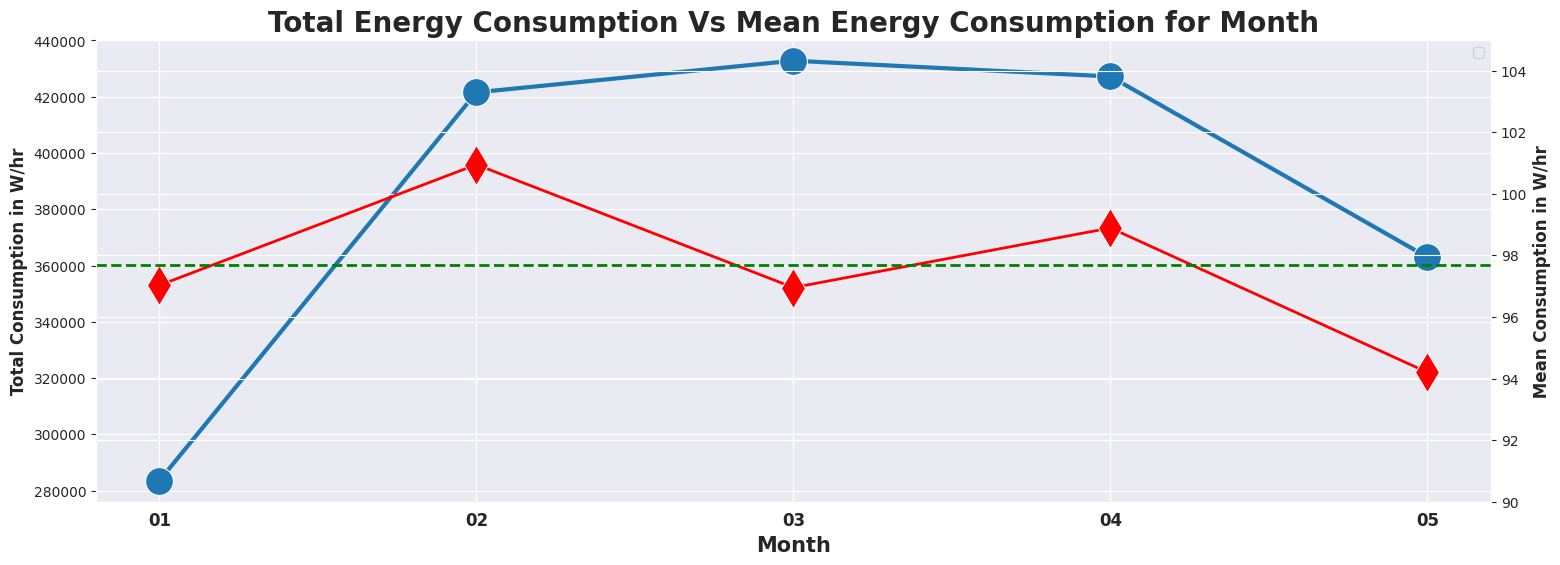

In [ ]:
# ENERGY CONSUMPTION & AVERAGE ENERGY CONSUMPTION PER MONTH 
sns.set_style('darkgrid')

plt.figure(figsize=(18,6))
axis1=sns.lineplot(x=data.Month,y=data.Consumption,marker='o',ci=None, 
             linewidth=3,markersize=20,estimator=np.sum)
axis1.set_title( 'Total Energy Consumption Vs Mean Energy Consumption for Month',
                fontsize=20,fontdict={"weight": "bold"})
axis1.set_xlabel('Month', fontsize=15,fontdict={"weight": "bold"})
axis1.set_ylabel(' Total Consumption in W/hr ', fontsize=12,fontdict={"weight": "bold"})
axis1.set_xticklabels(axis1.get_xticklabels(),size=12,fontdict={"weight": "bold"})
##-------------------------------------------------------------------------------------------------##
# Specifying The Same Axis
axis2 = axis1.twinx()
##-------------------------------------------------------------------------------------------------##
axis2=sns.lineplot(x=data.Month,y=data.Consumption,marker='d',ci=None,
             linewidth=2,markersize=20,color='red',dashes=True)
axis2.set_ylabel(' Mean Consumption in W/hr ', fontsize=12,fontdict={"weight": "bold"})
axis2.set_ylim([90,105])
#--------------------------------------------------------------------------------------------------#
axis2.axhline(data.Consumption.mean(),color='green',linestyle='dashed',linewidth='2')

plt.legend()
plt.show()

In [ ]:
print(f"We have data from Date: {data['Date'].min()} to Date: {data['Date'].max()} ")

We have data from Date: 2016-01-11 to Date: 2016-05-27 


* **Starting from the 11th of January through the 27th of May, we have 5 months of data.**

*  **The number of days varied from month to month, therefore, the amount of energy consumed varied widely. February had the highest average of 101 watts per hour, while May had the lowest average of 94 watts per hour.**


#### Energy consumption according to the Hours in the day.

In [ ]:
# Temperature features according to the Hour
hourly_temp_df=data.groupby(['Hour'])['Consumption', 'T1','T2','T3', 'T4','T5','T6',
                                'T7','T8','T9','T_out','Avg_Temp'].mean().reset_index()

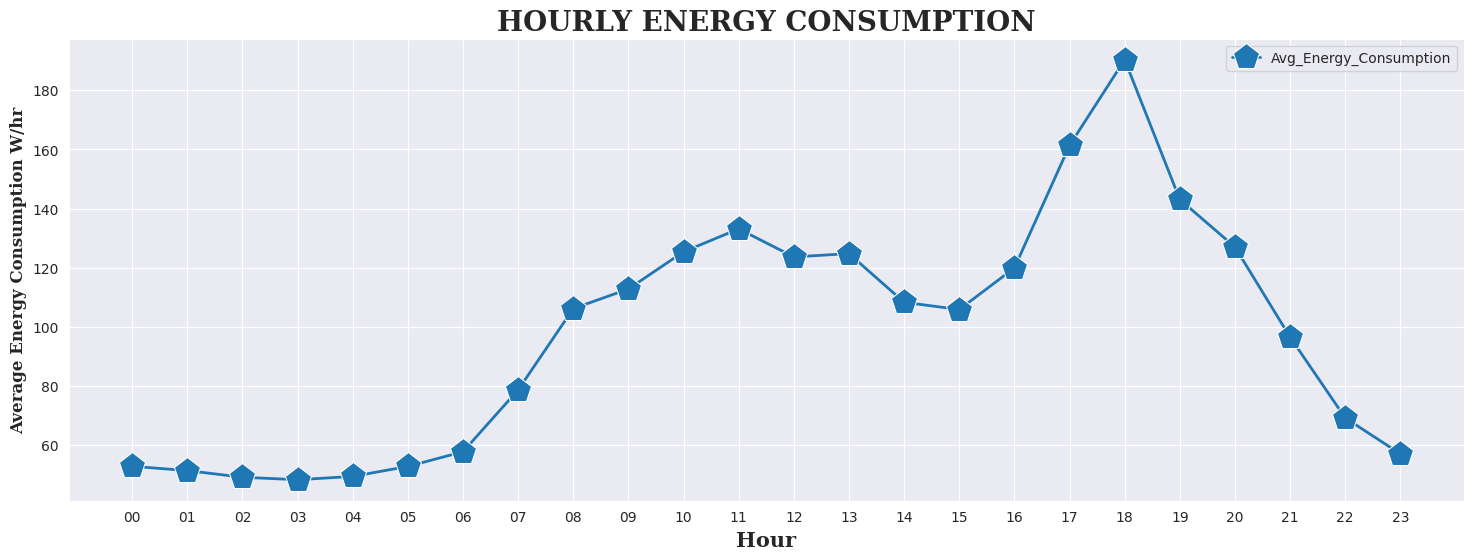

In [ ]:
# ENERGY CONSUMPTION & AVERAGE ENERGY CONSUMPTION PER HOUR 
sns.set_style('darkgrid')
plt.figure(figsize=(18,6))
sns.lineplot(x=hourly_temp_df.Hour,y=hourly_temp_df.Consumption,marker='p',ci=None,
             linewidth=2,markersize=20,legend='brief',label='Avg_Energy_Consumption')
plt.title( 'HOURLY ENERGY CONSUMPTION',fontsize=20,fontdict={"weight": "bold"}, fontfamily='serif')
plt.xlabel('Hour', fontsize=15,fontdict={"weight": "bold"}, fontfamily='serif')
plt.ylabel('Average Energy Consumption W/hr', fontsize=12,fontdict={"weight": "bold"}, fontfamily='serif')
plt.legend()
plt.show()

*   **It is obvious from the graph that energy consumption varies with the time of day.**

*   **The consumption of energy from late night to early morning is very low. This is because appliances are used less during the night.**

*   **The consumption of energy from morning until evening is moderate.**

*   **In the evening, energy consumption is highest.This is because appliances are used more during the evening.**

In [ ]:
hourly_temp_df

,Hour,Consumption,T1,T2,T3,T4,T5,T6,T7,T8,T9,T_out,Avg_Temp
0,00,52.785888,21.984336,20.071736,22.264619,21.063244,19.773448,5.802623,20.263099,22.379672,19.414779,6.072972,20.901867
1,01,51.326034,21.808582,19.819235,22.267202,20.914659,19.669697,5.572878,20.237877,22.237671,19.433406,5.792174,20.798541
2,02,49.075426,21.648167,19.597539,22.280853,20.757661,19.584937,5.305511,20.213718,22.111171,19.450984,5.556792,20.705629
3,03,48.236010,21.497259,19.403972,22.281183,20.616136,19.514343,5.083243,20.186803,22.005521,19.462287,5.299311,20.620938
4,04,49.355231,21.359599,19.231141,22.268101,20.497575,19.452120,4.904634,20.153959,21.904606,19.474698,5.047476,20.542725
5,05,52.737226,21.238172,19.079161,22.230471,20.395547,19.398241,4.800352,20.119793,21.807153,19.479062,4.889751,20.468450
6,06,57.712895,21.145559,18.979968,22.154772,20.308784,19.361282,4.893600,20.090291,21.708113,19.480995,4.836766,20.403720
7,07,78.649635,21.074625,18.984885,22.085462,20.267484,19.356990,5.396624,20.046490,21.600129,19.475854,5.034693,20.361490
8,08,106.143552,21.045174,19.419363,22.017272,20.390519,19.360290,6.601784,19.970626,21.471036,19.526685,5.649926,20.400121
9,09,112.785888,21.062342,20.129343,21.972464,20.641993,19.382910,7.875578,19.914661,21.366458,19.551915,6.587756,20.502761


In [ ]:
hourly_outside_weather=data.groupby(['Hour'])['Press_mm_hg','Windspeed','Visibility',
                                                              'Tdewpoint'].mean().reset_index()

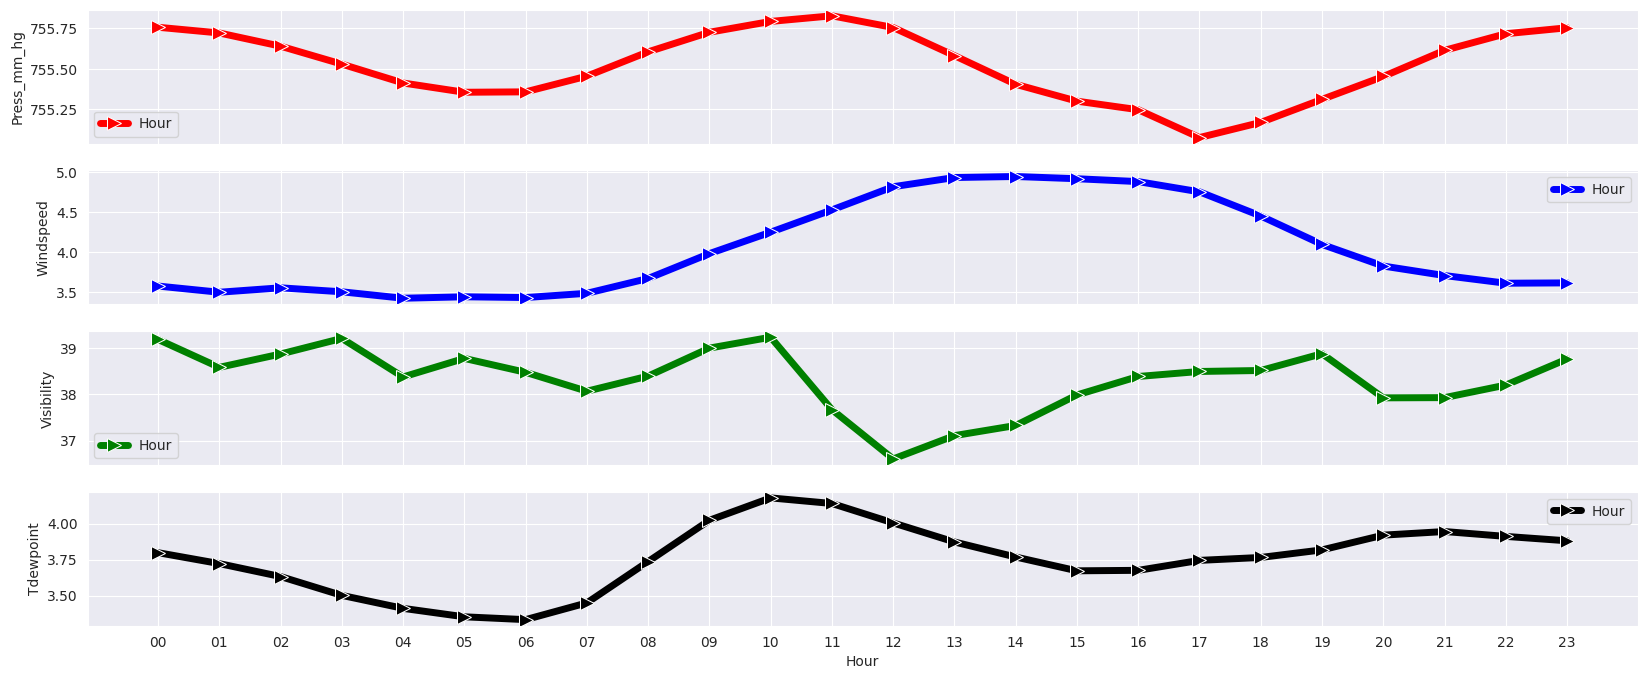

In [ ]:
Feature=hourly_outside_weather.columns.to_list()[1:]
fig, ax = plt.subplots(4,1, sharex=True,figsize=(20,8))
colors=['red','blue','green','black']
for i in range(4):
  axisss=sns.lineplot(x=hourly_outside_weather.Hour,y=hourly_outside_weather[Feature[i]],ax=ax[i],
               marker='>',linewidth=5,markersize=10,color=colors[i])
  axisss.legend(axisss.get_lines(), hourly_outside_weather.columns, loc='best')

* **Press_mm_hg:-There is no relationship observed between outside atmospheric pressure and energy consumption throughout the day.**

* **Windspeed:-On Average windspeed is higher during the day than the night and early morning, it may have an effect on energy consumption, as energy consumption is also higher during the day.**

* **Visibility & Tdewpoint :-Energy consumption has no relationship to Visibility  or Tdewpoint throughout the day.**

In [ ]:
# # Let's create subplots for Month wise Energy Consumption and Temperature
Feature=Temperature_df.columns.to_list()  # List of all Temperature variables
axes=[]  # For axis
a=0      # No of rows
# Range for subplots 
while a < 6 :
  for i in range(2):  # No. of column
    axes.append((a,i))
  a+=1
# Plot for Subplots
figure,axis=plt.subplots(6,2,figsize=(20,30))
for i in range (11):
  ax1=sns.scatterplot(x=Temperature_df[Feature[i]],y=data['Consumption'], hue=data.Month,
                     alpha=0.5,ax=axis[axes[i][0],axes[i][1]])
  ax1.set_xlabel(Feature[i],size=15,fontdict={"weight": "bold"})
  ax1.set_ylabel('Energy Consumption in W/hr',size=10,fontdict={"weight": "bold"})
figure.delaxes(axis[5,1])

* **Plots above shows the relationship between all the temperature parameters and Energy consumption for all five months.**

* **The graphs clearly shows that there is no linear relationship between all the temperature parameters and energy consumption.**

* **As the year progresses, the average temperature for all the inside parameters has increased.**

In [ ]:
# Let's create subplots for Month wise Energy Consumption and Humidity
Feature=Humidity_df.columns.to_list()  # List of all Humidity variables
axes=[]  # For axis
a=0      # No of rows
# Range for subplots 
while a < 6 :
  for i in range(2):  # No. of column
    axes.append((a,i))
  a+=1
# Plot for Subplots
sns.set_style('darkgrid')
figure,axis=plt.subplots(6,2,figsize=(20,30))
for i in range (11):
  ax1=sns.scatterplot(x=Humidity_df[Feature[i]],y=data['Consumption'],
                      hue=data.Month,alpha=0.4,ax=axis[axes[i][0],axes[i][1]])
  ax1.set_xlabel(Feature[i],size=15,fontdict={"weight": "bold"})
  ax1.set_ylabel('Energy Consumption in W/hr',size=10,fontdict={"weight": "bold"})
figure.delaxes(axis[5,1])

In [ ]:
# Let's create subplots for Month wise Energy Consumption and Temperature
Feature=Chievres_weather_station_df.columns.to_list()  # List of all features
axes=[]  # For axis
a=0      # No of rows
# Range for subplots 
while a < 2 :
  for i in range(2):  # No. of column
    axes.append((a,i))
  a+=1
# Plot for Subplots
sns.set_style('darkgrid')
figure,axis=plt.subplots(2,2,figsize=(20,15))
for i in range (4):
  ax1=sns.scatterplot(x=Chievres_weather_station_df[Feature[i]],y=data['Consumption'],
                      hue=data.Month,alpha=0.4,ax=axis[axes[i][0],axes[i][1]])
  ax1.set_xlabel(Feature[i],size=15,fontdict={"weight": "bold"})
  ax1.set_ylabel('Energy Consumption in W/hr',size=10,fontdict={"weight": "bold"})


In [ ]:
data['Date']

In [ ]:
# Using Plotly library plotting daily Energy consumption
fig = px.line(data, x='Date', y='Consumption')
fig.show()

In [ ]:
# CORRELATION PLOT FOR ALL THE VARIABLES
plt.figure(figsize=(22,20))
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')

### **Observations based on correlation plot**
**1. Temperature**- All the temperature variables from T1-T9 and T_out have
positive correlation with the target Appliances . For the indoor
temperatures, the correlations are high as expected, since the ventilation
is driven by the HRV unit and minimizes air tempera-ture differences
between rooms. Four columns have a high degree of correlation with T9
- T3,T5,T7,T8 also T6 & T_Out has high correlation (both temperatures
from outside) . Hence T6 & T9 can be removed from training set as
information provided by them can be provided by other fields.

**2. Weather attributes** - Visibility, Tdewpoint, Press_mm_hg have low
correlation values

**3. Humidity** - There are no significantly high correlation cases (> 0.9) for
humidity sensors.



**4. The random variables rv1, rv2 and Visibility, Tdewpoint,
Press_mm_hg have low correlation with the target variable.**

# **OUTLIERS DETECTION**

In [ ]:
data['Consumption'].describe()

---
---
***Data is too much positively skewed as 25% values at higher side are fall between the 100 and 1080 and other 75% fall between the 10 and 100.***

***It also indiacates that at higher side data have the lots of outliers.***

---
---

**Outliers detection based on z_score.**

In [ ]:
# Let's find out the z_score for the Energy consumption column
z_score=abs(stats.zscore(data['Consumption']))

# Let's create new column for z_score 
data['z_score']=abs(stats.zscore(data['Consumption']))

In [ ]:
# Creating a new data frame based on z_score for removing outliers
New_Appliances_z_score=data[data['z_score'] <= 3]

# Data frame only with outliers based on the z_score for removing outliers
outliers_df_z_score=data[data['z_score'] > 3]

In [ ]:
# Description of data frame with outliers
New_Appliances_z_score['Consumption'].describe().apply(lambda x: format(x,'.2f'))

In [ ]:
# Description of data frame without outliers based on IQR
outliers_df_z_score['Consumption'].describe().apply(lambda x: format(x,'.2f'))

In [ ]:
# Let's feature Consumption before and after outliers removal

plt.figure(figsize=(20,6))
sns.set_style('darkgrid')

# Distribution of Energy Consumption
plt.subplot(1,2,1)
sns.distplot(data.Consumption,bins=30,color='Blue')

# Box plot for Energy Consumption
plt.subplot(1,2,2)
sns.distplot(New_Appliances_z_score.Consumption)

In [ ]:
print(f"Data shape before outlier removal {data.shape} and after outliers removal {New_Appliances_z_score.shape}.")

# **Outliers Detection based upon IQR.**

In [ ]:
# IQR = 75% Percentile - 25% Percentile
IQR=(data['Consumption'].quantile(0.75)) -(data['Consumption'].quantile(0.25))

print("The IQR for Consumption is : ",IQR)

In [ ]:
# The upper limit 
upper_limit=(data['Consumption'].quantile(0.75) + (1.5 * (IQR)))
# The Lower limit 
lower_limit=abs(data['Consumption'].quantile(0.25) - (1.5 * (IQR)))

print(f"The upper limit is : {upper_limit} and lower limit is : {lower_limit}")

In [ ]:
# New data frame after removing outliers based on the IQR
Appliances_df_IQR=data[(data['Consumption'] >= lower_limit) & (data['Consumption'] <= upper_limit)]

# Data frame only with outliers based on the IQR
outliers_df_IQR=data[(data['Consumption'] <= lower_limit) | (data['Consumption'] >= upper_limit)]

In [ ]:
# Description of data frame with outliers
outliers_df_IQR['Consumption'].describe().apply(lambda x: format(x,'.2f'))

In [ ]:
# Description of data frame without outliers based on IQR
Appliances_df_IQR['Consumption'].describe().apply(lambda x: format(x,'.2f'))

In [ ]:
# Let's feature Consumption before and after outliers removal

plt.figure(figsize=(20,6))
sns.set_style('darkgrid')

# Distribution of Energy Consumption
plt.subplot(1,2,1)
sns.distplot(data.Consumption,bins=30,color='Blue')

# Box plot for Energy Consumption
plt.subplot(1,2,2)
sns.distplot(Appliances_df_IQR.Consumption)

In [ ]:
print(f"Data shape before outlier removal {data.shape} and after outliers removal {Appliances_df_IQR.shape}.")

**We can conclude after observing both the outliers detection technique that using IQR we can remove most of the outliers from the data.**

**So,for further processes we will use "Appliances_df_IQR" data frame.**

##**LABLE ENCODING AND ONE HOT CODING**

**Transformation for the day of week.**

In [ ]:
# Dictionary of  week days with numerical values as per the importance based on the avergae consumption
week_days={'Tuesday':0,'Wednesday':0,'Thursday':0,'Sunday':0,'Friday':1,'Saturday':1,'Monday':2}

In [ ]:
# Replacing week days with numerical values as per the importance based on the avergae consumption
Appliances_df_IQR['Day'].replace(week_days,inplace=True)

**Transformation for the Hour of Day.**

In [ ]:
# Changing the data type from string to Numeric
Appliances_df_IQR['Hour']=Appliances_df_IQR['Hour'].astype('int')

In [ ]:
# Creating a function Encoding to replace hourly values into lables as per energy consumption
def encoding(i):
    if (i >= 21) or (i <= 6): # Late night to Early morning
      return 0
    if (i > 6) and (i < 16):  # Morning to Evening
      return 1
    else:
      return 2                # Evening

In [ ]:
# Applying Encoding function to the Feature Hour
Appliances_df_IQR['Hour']=Appliances_df_IQR['Hour'].apply(encoding)

In [ ]:
# Checking the transformation
Appliances_df_IQR['Hour'].value_counts()

**Transformation for the Month.**

In [ ]:
month_dict={'01':1,'03':1,'04':1,'02':2,'05':0}

In [ ]:
# Replacing Month with numerical values as per the importance based on the avergae consumption
Appliances_df_IQR['Month'].replace(month_dict,inplace=True)

In [ ]:
Appliances_df_IQR.head()

 **DATA PRE-PROCESSING**

 **Data destribution for dependable variable Consumption is positively skewed.**

**So,by using Log Transformation we will Normalize the data.**

In [ ]:
# Assigning 'y' to the dependable variable
y=Appliances_df_IQR['Consumption']

# Applying Log Transformation with base of 10.
y=np.log(y)

 **INDEPENDENT VARIABLES**

In [ ]:
Appliances_df_IQR.columns

In [ ]:
# Dropping all the unnecessary features and assigning 'x' to the independant variables

X=Appliances_df_IQR.drop(['Consumption','Date','z_score'],axis=1)


In [ ]:
X.head(5)

### **SPLITTING THE DATA INTO TEST AND TRAIN**

In [ ]:
X.isin([np.inf]).sum()

In [ ]:
X.isin([-np.inf]).sum()

In [ ]:
# Splitting the data by 80-20
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.20,random_state=1)

In [ ]:
print(f"The shape of Training X values {X_train.shape}  and training y values {y_train.shape}")
print(f"The shape of testing X values {X_test.shape}  and testing y values {y_test.shape}")

In [ ]:
# Importing standard scaler
scaler = StandardScaler()

# Scaling train data set
X_train = scaler.fit_transform(X_train)

# Scaling test data set
X_test = scaler.transform(X_test)

# ⬛ **BASELINE MODELS**

In [ ]:
# Importing Linear Regression Model
lr = LinearRegression()
# Importing Linear Regression Lasso Model
lasso = Lasso(random_state=0)
# Importing Linear Regression Ridge Model
ridge = Ridge(random_state=0)
# Importing KN Regression Model
knn = neighbors.KNeighborsRegressor()
# Importing SVR Model
svm = SVR(kernel='rbf')
# Importing Random Forest Regressor Model
rf = RandomForestRegressor(random_state=0)
# Importing Gradient Boosting Regressor Model
gbr = GradientBoostingRegressor(random_state=0)
# Importing XGB Regressor Model
xgbr = xgb.XGBRegressor(objective='reg:squarederror', random_state=0)
# Importing LGBM Regressor Model
lgbm = LGBMRegressor(random_state=0)

◼ **Creating a function which gives output for all the baseline models.**

In [ ]:
# List of Baseline regressor models
models=[lr, lasso, ridge, knn, svm, rf, gbr, xgbr, lgbm]

In [ ]:
def baseline_model(X_train,y_train,X_test,y_test):
    df_columns=[]
    df=pd.DataFrame(columns=df_columns)
    i=0

    # Iterating over model one by one   
    for model in models:
        model.random_state=0
        model.fit(X_train,y_train)
        train_pred = model.predict(X_train)
        test_pred = model.predict(X_test)      
               
        #insert in dataframe
        df.loc[i,"Model_Name"]=model.__class__.__name__
        
        df.loc[i,'Train_R2'] = metrics.r2_score(np.exp (y_train), np.exp(train_pred) )
        df.loc[i,'Test_R2'] =metrics.r2_score(np.exp (y_test),np.exp(test_pred) )
        
        df.loc[i,'Train_RMSE'] = sqrt(mean_squared_error(np.exp (y_train), np.exp(train_pred) ) )
        df.loc[i,'Test_RMSE'] = sqrt(mean_squared_error(np.exp (y_test),np.exp (test_pred) ) )
        
        df.loc[i,'Train_MAE'] = mean_absolute_error( np.exp(y_train),np.exp(train_pred) )
        df.loc[i,'Test_MAE'] = mean_absolute_error(np.exp (y_test),np.exp (test_pred) )
        
        i+=1

    return(df)

In [ ]:
# Start timimg of execution of function
start_time = time.time()
# Input for Model score function
scores_baseline = baseline_model(X_train,y_train,X_test,y_test)
# End time of execution of function
end_time = time.time()
print(f"Time for execution {(end_time)-(start_time)} seconds")
# Final Output
scores_baseline

#### As observed from results, **SVR,GradientBoostingRegressor,XGBRegressor,LGBMRegressor** performs better than all other regressors in terms of all metrics.

In [ ]:
# ENERGY CONSUMPTION & AVERAGE ENERGY CONSUMPTION PER MONTH 
sns.set_style('darkgrid')

plt.figure(figsize=(18,6))
axis1=sns.lineplot(x=scores_baseline.Model_Name,y=scores_baseline.Train_R2,marker='o',ci=None,
             linewidth=3,markersize=20)
axis1.set_title( 'TRAINING MODELS',
                fontsize=20,fontdict={"weight": "bold"})
axis1.set_xlabel('MODEL', fontsize=15,fontdict={"weight": "bold"})
axis1.set_ylabel('R2 SCORE', fontsize=12,fontdict={"weight": "bold"})
axis1.set_xticklabels(axis1.get_xticklabels(),size=12,fontdict={"weight": "bold"},rotation=45)
##-------------------------------------------------------------------------------------------------##
# Specifying The Same Axis
axis2 = axis1.twinx()
##-------------------------------------------------------------------------------------------------##
axis2=sns.lineplot(x=scores_baseline.Model_Name,y=scores_baseline.Train_RMSE,marker='*',ci=None,
             linewidth=2,markersize=20,color='red',dashes=True)
axis2.set_ylabel('RMSE', fontsize=12,fontdict={"weight": "bold"})
#--------------------------------------------------------------------------------------------------#
plt.legend()
plt.show()

⚫  **In order to minimize computational time, baseline models are created to give a general understanding of performance.**

*   **The Linear Regression model has performed extremely poorly. This is because there is no significant linear relationship between the dependable variable and the independent variable.**
*   **As compared to other models, the Random Forest Regression model has performed best with the highest R*2 scores in both Testing and Training.**

*   **It is also evident from the result that the Random Forest Regression model has more variance as the difference between testing and training r*2 is greater.**
*   **K-Nearest Neighbors Regression model, Support Vector Regression model, and Light Gradient Boosting Machine model also performed well and have low bias and variance compared to the Random Forest Regressor model.**


*   **A Gradient Boosting Regression model (GBM) or the Extreme Gradient Boosting Regression model (XGB) also poorly performed.**







##  **CROSS-VALIDATION AND FEATURES IMPORTANCE**

In [ ]:
# Function for cross-validation using K-FoldCV

def K_FoldCV(model_name, model):
  df_columns=[]
  df=pd.DataFrame(columns=df_columns)
  start_time = time.time()
  KFOLD = KFold(n_splits=5, random_state=1, shuffle=True)
  RMSE_Train = -cross_val_score(model,X_train,y_train, cv=KFOLD, scoring='neg_root_mean_squared_error')
  RMSE_Test = -cross_val_score(model,X_test, y_test, cv=KFOLD, scoring='neg_root_mean_squared_error')
  end_time = time.time()
  print(model_name)
  df['RMSE_Train']=RMSE_Train
  df['RMSE_Test']=RMSE_Test
  df.reset_index()
  df['RMSE_Train']=df['RMSE_Train'].apply(lambda x: format(x,'0.3f'))      
  df['RMSE_Test']=df['RMSE_Test'].apply(lambda x: format(x,'0.3f'))                         
  print(df.T)
  print('MEAN_RMSE_Train : {:0.4f} '.format(RMSE_Train.mean()))
  print('MEAN_RMSE_Test : {:0.4f} '.format(RMSE_Test.mean()))
  print('STD_RMSE_Train : {:0.4f} '.format(RMSE_Train.std()))
  print('STD_RMSE_Test : {:0.4f} '.format(RMSE_Test.std()))
  print("Time for execution : {:0.2f} " .format((end_time)-(start_time)))

In [ ]:
# SVR Model
K_FoldCV('SVR',svm)

⚫

In [ ]:
# GradientBoostingRegressor Model
K_FoldCV('GradientBoostingRegressor',gbr)

⚫

In [ ]:
# XGB Regressor Model
K_FoldCV('XGBRegresso',xgbr)

⚫

In [ ]:
# LGBMRegressor Model
K_FoldCV('LGBMRegressor',lgbm)

⚫

In [ ]:
def feature_importance(X, model, model_name):
  features = X.columns
  importances = model.feature_importances_
  indices = np.argsort(importances)

  plt.title(f'Feature Importance {model_name}')
  plt.barh(range(len(indices)), importances[indices], color='red', align='center')
  plt.yticks(range(len(indices)), [features[i] for i in indices])
  plt.xlabel('Relative Importance')

In [ ]:
#plot feature importance
plt.figure(figsize=(19,8))

plt.subplot(121)
feature_importance(X, gbr, 'Gradient Boosting')

plt.subplot(122)
feature_importance(X, xgbr, 'XGBoost')



# ⬛ **MODELS WITH HYPER-PARAMETER TUNING AND FEATURE SELECTION**

In [ ]:
def build_model(model, param_dict, xtrain, ytrain):
  start_time = time.time()
  grid = RandomizedSearchCV(estimator=model,
                       param_distributions = param_dict,
                       cv = 5, verbose=2, scoring='neg_mean_squared_error')
  grid.fit(xtrain, ytrain)
  optimal_model = grid.best_estimator_
  end_time = time.time()
  print('\n\n\n')
  print('Best Parameters =', grid.best_params_)
  print("Time for execution : {:0.2f} " .format((end_time)-(start_time)),'Seconds')
  return optimal_model

In [ ]:
def predict(model_name, optimal_model, xtrain, xtest, ytrain, ytest):

  train_pred = optimal_model.predict(xtrain)
  test_pred = optimal_model.predict(xtest)

  print('\n')
  print('R2 Score for train =', metrics.r2_score(ytrain,train_pred))
  print('R2 Score for test =', metrics.r2_score(ytest,test_pred))

  print('\n')
  print('RMSE for train =', sqrt(mean_squared_error(ytrain,train_pred )))
  print('RMSE for test =', sqrt(mean_squared_error(ytest,test_pred)))

  print('\n')
  print('MAE =', mean_absolute_error( ytrain,train_pred))
  print('MAE =', mean_absolute_error( ytest,test_pred))

In [ ]:
# make dict
param_dict_gbm = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 500, 40),
    'learning_rate': [0.01, 0.05, 0.01, 0.005],
    'random_state': [0] }

In [ ]:
start_time = time.time()
gbm_optimal_model = build_model(gbr, param_dict_gbm, X_train, y_train)
end_time = time.time()
print(f"Time for execution {(end_time)-(start_time)} seconds")

In [ ]:
# best parameter
gbm_optimal_model.get_params

In [ ]:
# make df
df_columns=[]
df1=pd.DataFrame(columns=df_columns)
i=1
gbm_optimal_model.fit(X_train,y_train)
train_pred = gbm_optimal_model.predict(X_train)
test_pred = gbm_optimal_model.predict(X_test)      
               
        #insert in dataframe
df1.loc[i,"Model_Name"]= 'GBMRegressor_with_hyper'
        
df1.loc[i,'Train R2'] = r2_score(y_train,train_pred) 
df1.loc[i,'Test R2'] = r2_score(y_test,test_pred) 
        
df1.loc[i,'Train RMSE'] = sqrt(mean_squared_error(np.exp(y_train),np.exp(train_pred) )) 
df1.loc[i,'Test RMSE'] = sqrt(mean_squared_error(np.exp(y_test),np.exp(test_pred) )) 
        
df1.loc[i,'Train MAE'] = mean_absolute_error(np.exp(y_train), np.exp(train_pred)) 
df1.loc[i,'Test MAE'] = mean_absolute_error(np.exp(y_test),np.exp(test_pred))

df1['Train R2'] = df1['Train R2'].apply(lambda x: format(float(x),'0.3f')) 
df1['Test R2']  =  df1['Test R2'].apply(lambda x: format(float(x),'0.3f'))

df1['Train RMSE'] = df1['Train RMSE'].apply(lambda x: format(float(x),'0.3f'))
df1['Test RMSE']  = df1['Test RMSE'].apply(lambda x: format(float(x),'0.3f')) 
df1['Test MAE']  =  df1['Test MAE'].apply(lambda x: format(float(x),'0.3f'))
df1['Train MAE'] =  df1['Train MAE'].apply(lambda x: format(float(x),'0.3f'))  
df1 

In [ ]:
param_dict_svm = {'C': [0.1, 1, 10], 
              'gamma': [1, 0.1, 0.01],
              'kernel': ['rbf']
              }

In [ ]:
start_time = time.time()
svm_optimal_model = build_model(svm, param_dict_svm, X_train, y_train)
end_time = time.time()
print(f"Time for execution {(end_time)-(start_time)} seconds")

In [ ]:
# best pram
svm_optimal_model.get_params

In [ ]:
df_columns=[]
df1=pd.DataFrame(columns=df_columns)
i=1
svm_optimal_model.fit(X_train,y_train)
train_pred = svm_optimal_model.predict(X_train)
test_pred = svm_optimal_model.predict(X_test)      
               
        #insert in dataframe
df1.loc[i,"Model_Name"]= 'SVMRegressor_with_hyper'
        
df1.loc[i,'Train R2'] = r2_score(y_train,train_pred) 
df1.loc[i,'Test R2'] = r2_score(y_test,test_pred) 
        
df1.loc[i,'Train RMSE'] = sqrt(mean_squared_error(np.exp(y_train),np.exp(train_pred) )) 
df1.loc[i,'Test RMSE'] = sqrt(mean_squared_error(np.exp(y_test),np.exp(test_pred) )) 
        
df1.loc[i,'Train MAE'] = mean_absolute_error(np.exp(y_train), np.exp(train_pred)) 
df1.loc[i,'Test MAE'] = mean_absolute_error(np.exp(y_test),np.exp(test_pred))

df1['Train R2'] = df1['Train R2'].apply(lambda x: format(float(x),'0.3f')) 
df1['Test R2']  =  df1['Test R2'].apply(lambda x: format(float(x),'0.3f'))

df1['Train RMSE'] = df1['Train RMSE'].apply(lambda x: format(float(x),'0.3f'))
df1['Test RMSE']  = df1['Test RMSE'].apply(lambda x: format(float(x),'0.3f')) 
df1['Test MAE']  =  df1['Test MAE'].apply(lambda x: format(float(x),'0.3f'))
df1['Train MAE'] =  df1['Train MAE'].apply(lambda x: format(float(x),'0.3f'))  
df1 

In [ ]:
# make dict
param_dict_xgb = {
    'objective':['reg:squarederror'],
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.05, 0.01, 0.005],
    'random_state': [0]}

In [ ]:
# build model
xgb_optimal_model = build_model(xgbr, param_dict_xgb, X_train, y_train)

In [ ]:
# best param
xgb_optimal_model.get_params

# **Final Model Prediction**

In [ ]:
# make df 
df_columns=[]
df1=pd.DataFrame(columns=df_columns)
i=1
xgb_optimal_model.fit(X_train,y_train)
train_pred = xgb_optimal_model.predict(X_train)
test_pred = xgb_optimal_model.predict(X_test)      
               
        #insert in dataframe
df1.loc[i,"Model_Name"]= 'XGBRegressor_with_hyper'
        
df1.loc[i,'Train R2'] = r2_score(y_train,train_pred) 
df1.loc[i,'Test R2'] = r2_score(y_test,test_pred) 
        
df1.loc[i,'Train RMSE'] = sqrt(mean_squared_error(np.exp(y_train),np.exp(train_pred) )) 
df1.loc[i,'Test RMSE'] = sqrt(mean_squared_error(np.exp(y_test),np.exp(test_pred) )) 
        
df1.loc[i,'Train MAE'] = mean_absolute_error(np.exp(y_train), np.exp(train_pred)) 
df1.loc[i,'Test MAE'] = mean_absolute_error(np.exp(y_test),np.exp(test_pred))

df1['Train R2'] = df1['Train R2'].apply(lambda x: format(float(x),'0.3f')) 
df1['Test R2']  =  df1['Test R2'].apply(lambda x: format(float(x),'0.3f'))

df1['Train RMSE'] = df1['Train RMSE'].apply(lambda x: format(float(x),'0.3f'))
df1['Test RMSE']  = df1['Test RMSE'].apply(lambda x: format(float(x),'0.3f')) 
df1['Test MAE']  =  df1['Test MAE'].apply(lambda x: format(float(x),'0.3f'))
df1['Train MAE'] =  df1['Train MAE'].apply(lambda x: format(float(x),'0.3f'))  
df1 

In [ ]:
# make dataframe for prediction
df = pd.DataFrame({'Prediction':test_pred,'Actual':y_test})
df['Error'] = df['Actual'] - df['Prediction']
df.head()

# **Conclusion**

### **EDA**
---

*   **Monday has the highest total energy consumption as well as the highest mean energy consumption.**

*   **Tuesday has the lowest total energy consumption as well as the lowest mean energy consumption..**

*  **The number of days varied from month to month, therefore, the amount of energy consumed varied widely. February had the highest average of 101 watts per hour, while May had the lowest average of 94 watts per hour.**


*   **The consumption of energy from late night to early morning is very low. This is because appliances are used less during the night.**


*   **In the evening, energy consumption is highest.This is because appliances are used more during the evening.**

* **All the temperature variables from T1-T9 and T_out have positive correlation with the target Appliances.**

* **Windspeed:-On Average windspeed is higher during the day than the night and early morning, it may have an effect on energy consumption, as energy consumption is also higher during the day.**



---
---
**In order to minimize computational time, baseline models are created to give a general understanding of performance.**

*   **The Linear Regression model has performed extremely poorly. This is because there is no significant linear relationship between the dependable variable and the independent variable.**
*   **As compared to other models, the Random Forest Regression model has performed best with the highest R*2 scores in both Testing and Training.**

*   **It is also evident from the result that the Random Forest Regression model has more variance as the difference between testing and training r*2 is greater.**
*   **K-Nearest Neighbors Regression model, Support Vector Regression model, and Light Gradient Boosting Machine model also performed well and have low bias and variance compared to the Random Forest Regressor model.**


*   **A Gradient Boosting Regression model (GBM) or the Extreme Gradient Boosting Regression model (XGB) also poorly performed.**

---
---
* **For hyperparameter tuning  i used only three models based on the low RMSE SCORE.the models are 1)Gradient Boosting Regression model (GBM),2) Extreme Gradient Boosting Regression model (XGB),3)Support Vectore Machine(SVM).**

* **After performing tuning on these models we observe that the model Extreme Gradient Boosting Regression model (XGB) is the best with low RMSE and High R2 SCORE as compared to other models.**

* **The top 3 important features are humidity attributes, which leads to the conclusion that humidity affects power consumption more than temperature. Windspeed is least important as the speed of wind doesn’t affect power consumption inside the house. So controlling humidity inside the house may lead to energy savings.**
---
---